In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

In [2]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    return Image.open(Im).size
def get_xy(Im):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [3]:
df = get_data('AQUA.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]
im = Image.open('AQUA.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('AquaS.png')

In [4]:
df = get_data('AquaS.png')
df = df.iloc[:,2:].drop_duplicates()


In [15]:
def inspect(Im,cluster,background = (0,0,0)):
    """View all the pixels in a specific cluster derived from HC"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open(Im)
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = background
    return im  

In [9]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 17,criterion = 'maxclust', method = 'average')
dfo = get_data('AquaS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [ ]:
df['Cluster'].value_counts()

In [8]:
df.head()

,x,y,R,G,B,Cluster
0,0,0,100,196,188,8
1,51,430,100,196,188,8
2,52,432,100,196,188,8
3,70,398,100,196,188,8
4,79,457,100,196,188,8


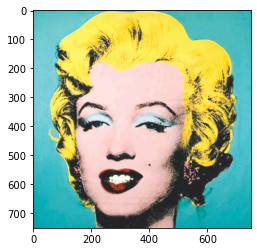

In [13]:
plt.imshow(im)

In [10]:
set(df['Cluster'].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [12]:
def new_recolor(Im,cluster,color):   
    ind = df.loc[df['Cluster'] == cluster,['x','y']]
    c = np.asarray(inspect(Im,cluster))
    for i,j in zip(list(ind['x']),list(ind['y'])):
        c[j,i] = color
    return c

In [47]:
cluster1 = new_recolor('AquaS.png',1,(242, 204, 183,225))
cluster2 = new_recolor('AquaS.png',2,(196,212, 148,225))
cluster3 = new_recolor('AquaS.png',3,(209, 148, 119,225))
cluster4 = new_recolor('AquaS.png',4,(255,255,240,225))
cluster5 = new_recolor('AquaS.png',5,(241,204,143,225))
cluster6 = new_recolor('AquaS.png',6,(196,212, 148,225))
cluster7 = new_recolor('AquaS.png',7,(196,212, 148,225))
cluster8 = new_recolor('AquaS.png',8,(196,212, 148,225))
cluster9 = new_recolor('AquaS.png',9,(50,50,50,225))
cluster10 = new_recolor('AquaS.png',10,(100,140,92,225))
cluster11 = new_recolor('AquaS.png',11,(164,164,68,225))
cluster12 = new_recolor('AquaS.png',12,(172,116,44,225))
cluster13 = new_recolor('AquaS.png',13,(172,116,44,225))
cluster14 = new_recolor('AquaS.png',14,(209, 148, 119,225))
cluster15 = new_recolor('AquaS.png',15,(35,20,20,225))
cluster16 = new_recolor('AquaS.png',16,(60,76,44,225))
cluster17 = new_recolor('AquaS.png',17,(60,76,44,225))


In [21]:
df.loc[df['Cluster'] ==16]

,x,y,R,G,B,Cluster
283247,73,392,60,76,44,16
283248,107,343,60,76,44,16
283249,195,191,60,76,44,16
283250,365,85,60,76,44,16
283251,552,658,60,76,44,16
...,...,...,...,...,...,...
562425,688,386,60,60,4,16
562480,697,362,12,52,36,16
562486,698,360,28,92,68,16
562487,698,362,12,76,44,16


In [48]:
aqua_recolored = cluster1+cluster2+cluster3+cluster4+cluster5+cluster6+cluster7+cluster8+cluster9+cluster10+\
                    cluster11+cluster12+cluster13+cluster14+cluster15+cluster16+cluster17

[]

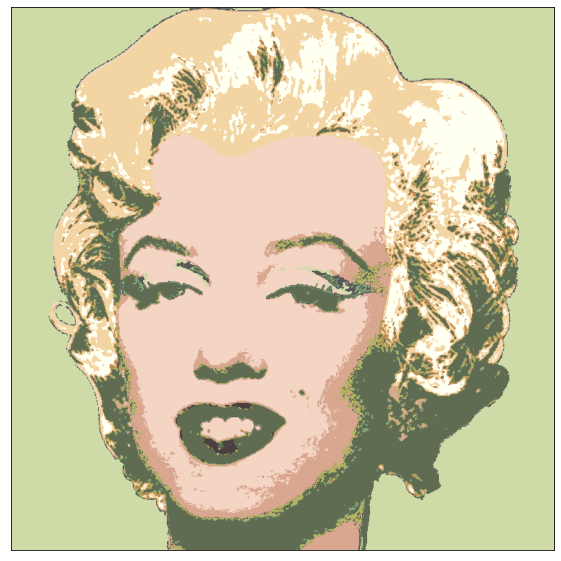

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(aqua_recolored)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])

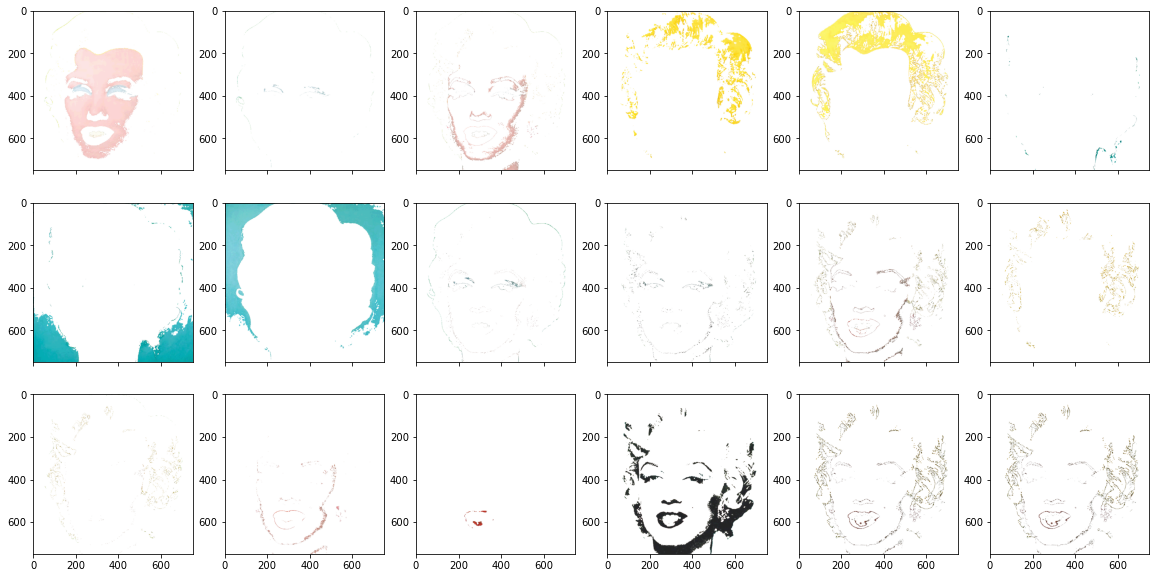

In [11]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('AquaS.png',1)))
ax[0][1].imshow(np.asarray(inspect('AquaS.png',2)))
ax[0][2].imshow(np.asarray(inspect('AquaS.png',3)))
ax[0][3].imshow(np.asarray(inspect('AquaS.png',4)))
ax[0][4].imshow(np.asarray(inspect('AquaS.png',5)))
ax[0][5].imshow(np.asarray(inspect('AquaS.png',6)))
ax[1][0].imshow(np.asarray(inspect('AquaS.png',7)))
ax[1][1].imshow(np.asarray(inspect('AquaS.png',8)))
ax[1][2].imshow(np.asarray(inspect('AquaS.png',9)))
ax[1][3].imshow(np.asarray(inspect('AquaS.png',10)))
ax[1][4].imshow(np.asarray(inspect('AquaS.png',11)))
ax[1][5].imshow(np.asarray(inspect('AquaS.png',12)))
ax[2][0].imshow(np.asarray(inspect('AquaS.png',13)))
ax[2][1].imshow(np.asarray(inspect('AquaS.png',14)))
ax[2][2].imshow(np.asarray(inspect('AquaS.png',15)))
ax[2][3].imshow(np.asarray(inspect('AquaS.png',16)))
ax[2][4].imshow(np.asarray(inspect('AquaS.png',17)))
ax[2][5].imshow(np.asarray(inspect('AquaS.png',17)))



In [50]:
cluster1 = new_recolor('AquaS.png',1,(242, 204, 183,225))
cluster2 = new_recolor('AquaS.png',2,(196,212, 148,225))
cluster3 = new_recolor('AquaS.png',3,(209, 148, 119,225))
cluster4 = new_recolor('AquaS.png',4,(176,196,222,225))
cluster5 = new_recolor('AquaS.png',5,(112,128,144,225))
cluster6 = new_recolor('AquaS.png',6,(230,212, 148,225))
cluster7 = new_recolor('AquaS.png',7,(230,212, 148,225))
cluster8 = new_recolor('AquaS.png',8,(230,212, 148,225))
cluster9 = new_recolor('AquaS.png',9,(50,50,50,225))
cluster10 = new_recolor('AquaS.png',10,(100,140,92,225))
cluster11 = new_recolor('AquaS.png',11,(164,164,68,225))
cluster12 = new_recolor('AquaS.png',12,(176,196,222,225))
cluster13 = new_recolor('AquaS.png',13,(172,116,44,225))
cluster14 = new_recolor('AquaS.png',14,(209, 148, 119,225))
cluster15 = new_recolor('AquaS.png',15,(39,56,74,225))
cluster16 = new_recolor('AquaS.png',16,(60,76,44,225))
cluster17 = new_recolor('AquaS.png',17,(60,76,44,225))

In [51]:
aqua_recolored = cluster1+cluster2+cluster3+cluster4+cluster5+cluster6+cluster7+cluster8+cluster9+cluster10+\
                    cluster11+cluster12+cluster13+cluster14+cluster15+cluster16+cluster17

[]

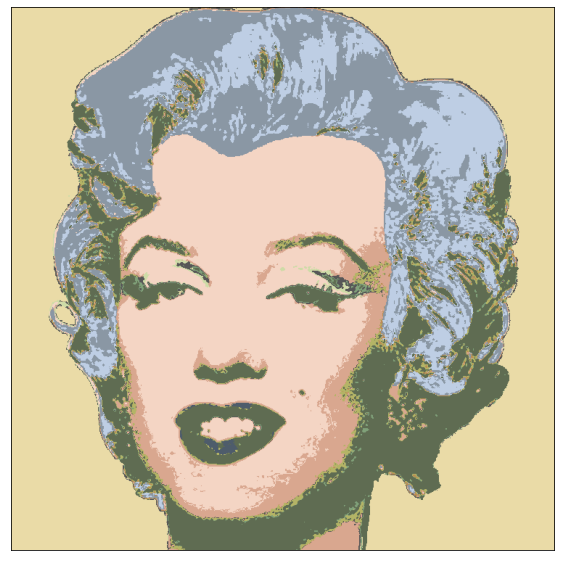

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(aqua_recolored)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])